# Classification of Traffic Signs using Le-Net Architecture with Keras

### About the Project :

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## Importing the necessary Libraries :

In [1]:
# For ignoring warinings, if any
import warnings 
warnings.filterwarnings("ignore")

# For loading the dataset, pickle implements binary protocols for serializing and deserializing data
import pickle

# Analysis
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 

## Loading the data :

### Loading the dataset using Pickle

In [2]:
 with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

### Making the Training, Validation and Testing Sets Respectively

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Data Preprocessing :

### Exploring The Data :

#### Finding the size of Training, Validation Data and Testing Data :

In [4]:
print("Training Data Size :\n X_train : {} \t y_train : {} ".format(X_train.shape, y_train.shape))

print("\nValidation Data Size :\n X_validation : {} \t y_validation : {} ".format(X_validation.shape, y_validation.shape))

print("\nTest Data Size :\n X_test : {} \t y_test : {} ".format(X_test.shape, y_test.shape))


Training Data Size :
 X_train : (34799, 32, 32, 3) 	 y_train : (34799,) 

Validation Data Size :
 X_validation : (4410, 32, 32, 3) 	 y_validation : (4410,) 

Test Data Size :
 X_test : (12630, 32, 32, 3) 	 y_test : (12630,) 


### Shuffling The Data :

The dataset may often be sorted beforehand, so before preprocessing or model building, it is better to shuffle the data

In [5]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

Now, before proceeding with the preprocessing of the data, let us take a particular index (say 101) and we'll compare the image before and after preprocessing the data.

### Preparing the Data :

Converting the images into grayscale :

In [6]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

Normalizing the Values for the Numpy Matrices of the Images :

In [7]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

### Comparing the original image with the Preprocessed Image :

Text(0.5, 1.0, 'Grayscale Image After Normalizing')

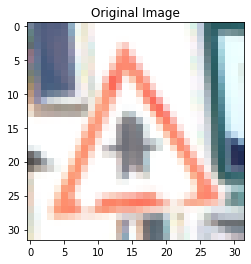

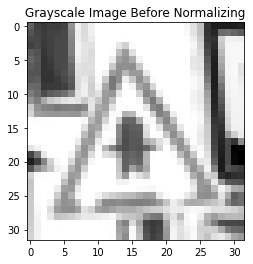

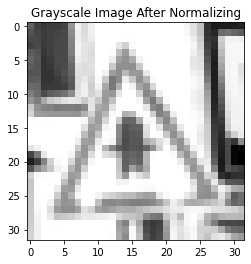

In [8]:
i = 101
plt.imshow(X_train[i])
plt.title("Original Image")
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = "gray")
plt.title("Grayscale Image Before Normalizing")
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = "gray")
plt.title("Grayscale Image After Normalizing")

We can see that there is not much difference between the original color image and the grayscale image, after preprocessing and the distinct features in the image can as easily be identified in the processed image as the original . However, converting the images to grayscale greatly reduces our computational cost.

## Building the Model (Le-Net Architecture) :

### Le-Net Architecture :

We are going to use a Le-Net Architecture for classifying the traffic signs.
The Le-Net architecture based convolutional neural network, for our classification of traffic signs is made of the following layers :
<br>
- 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43
 

### Importing the libraries :

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [10]:
print("Image Shape : {}".format(X_test_gray_norm[i].shape))

Image Shape : (32, 32, 1)


### Building the model architecture

In [11]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

### Compiling the Model 

In [12]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Training The Model :

In [13]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size=300, epochs=300, verbose=1, validation_data=( X_validation_gray_norm, y_validation))

loss: 9.4824e-05 - accuracy: 1.0000 - val_loss: 0.6738 - val_accuracy: 0.9247
Epoch 168/300
116/116 [==============================] - 1s 11ms/step - loss: 8.1458e-05 - accuracy: 1.0000 - val_loss: 0.6818 - val_accuracy: 0.9245
Epoch 169/300
116/116 [==============================] - 1s 11ms/step - loss: 7.4331e-05 - accuracy: 1.0000 - val_loss: 0.6880 - val_accuracy: 0.9236
Epoch 170/300
116/116 [==============================] - 1s 11ms/step - loss: 6.9673e-05 - accuracy: 1.0000 - val_loss: 0.6862 - val_accuracy: 0.9240
Epoch 171/300
116/116 [==============================] - 1s 11ms/step - loss: 6.1468e-05 - accuracy: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.9245
Epoch 172/300
116/116 [==============================] - 1s 11ms/step - loss: 5.7004e-05 - accuracy: 1.0000 - val_loss: 0.6975 - val_accuracy: 0.9231
Epoch 173/300
116/116 [==============================] - 1s 11ms/step - loss: 5.4774e-05 - accuracy: 1.0000 - val_loss: 0.6978 - val_accuracy: 0.9243
Epoch 174/300
116/116 

## Model Evaluation :

We are using Accuracy Score as a metric for model evaluation

In [14]:
score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose=0)
print("Test Accuracy = {:.4f}".format(score[1]))

Test Accuracy = 0.9164


### Plotting the Training and Validation Accuracy

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

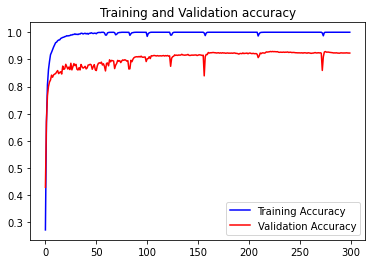

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


### Plotting The Training and Validation Loss

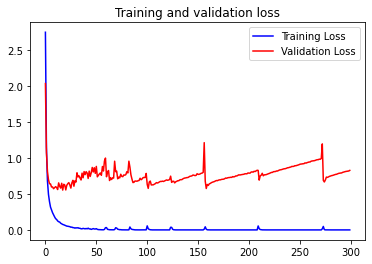

In [17]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()